In [77]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [78]:
# Read the CSV file into a Pandas DataFrame

districts = pd.read_csv('District_data.csv')
districts = districts.replace('redacted',0)
districts.head()

,District,County,District_type,Enrollment,FRL_Perc,Disadv_Perc,EL_Perc,Grad_Perc,Teach_to_stud,Susp_Perc,Chronic_absent,Math_metAbove,ELA_metAbove,Per_pupil_exp,Teacher_salary
0,New Jerusalem Elementary (San Joaquin),San Joaquin,Elementary School District,4831,56.7,58.11,8.6,NaN,24.9,1.5,21.4,16.83,27.56,126344,63979
1,Lincoln Elementary (Marin),Marin,Elementary School District,4,0.0,0.00,NaN,NaN,0.0,0,0,37.20,48.30,86414,76081
2,Big Sur Unified (Monterey),Monterey,Unified School District,116,27.6,30.17,6.0,NaN,11.3,1.3,3.1,18.18,27.27,83877,46630
3,Maple Creek Elementary (Humboldt),Humboldt,Elementary School District,4,50.0,50.00,NaN,NaN,2.4,0,0,37.20,48.30,69894,76081
4,Spencer Valley Elementary (San Diego),San Diego,Elementary School District,2412,55.6,56.72,4.2,NaN,28.4,0,28.3,89.47,73.68,65932,76081


In [79]:
districts.dtypes

District           object
County             object
District_type      object
Enrollment          int64
FRL_Perc          float64
Disadv_Perc       float64
EL_Perc           float64
Grad_Perc         float64
Teach_to_stud     float64
Susp_Perc          object
Chronic_absent     object
Math_metAbove     float64
ELA_metAbove      float64
Per_pupil_exp       int64
Teacher_salary      int64
dtype: object

In [53]:
# Fill NaaNs with zero. Replace "redacted" with zero.
districts = districts.fillna(0)
districts = districts.replace('redacted',0)

In [55]:
districts.dtypes

District           object
County             object
District_type      object
Enrollment        float64
FRL_Perc          float64
Disadv_Perc       float64
EL_Perc           float64
Grad_Perc          object
Teach_to_stud     float64
Susp_Perc          object
Chronic_absent     object
Math_metAbove      object
ELA_metAbove       object
Per_pupil_exp     float64
Teacher_salary    float64
dtype: object

In [45]:
### Replace NaaNs with means.

districts.mean()
districts = districts.fillna(districts.mean())
districts


,District,County,District_type,Enrollment,FRL_Perc,Disadv_Perc,EL_Perc,Grad_Perc,Teach_to_stud,Susp_Perc,Chronic_absent,Math_metAbove,ELA_metAbove,Per_pupil_exp,Teacher_salary
0,ABC Unified (Los Angeles),Los Angeles,Unified School District,20465.0,50.0,54.51,18.5,93.3,23.5,1.6,7,54.9,65.84,11678.0,84747.0
1,Acalanes Union High (Contra Costa),Contra Costa,High School District,5683.0,6.6,7.74,1.8,96.3,20.3,1.5,8.8,71.9,88.99,14765.0,93706.0
2,Ackerman Charter (Placer),Placer,Elementary School District,593.0,30.9,31.53,3.7,0,22.5,2.9,5.9,57.34,71.35,8824.0,65667.0
3,Acton-Agua Dulce Unified (Los Angeles),Los Angeles,Unified School District,15819.0,51.2,52.53,6.2,96.5,19.8,0.4,17.5,36.43,53.53,14260.0,0.0
4,Adelanto Elementary (San Bernardino),San Bernardino,Elementary School District,8671.0,78.8,82.06,15.1,0,24.3,6.7,18.9,16.76,27.76,12450.0,82719.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031,Yreka Union Elementary (Siskiyou),Siskiyou,Elementary School District,1012.0,71.4,71.64,2.5,0,18.6,2.3,15.1,28.91,38.03,11440.0,0.0
1032,Yreka Union High (Siskiyou),Siskiyou,High School District,629.0,47.5,48.01,2.5,92.5,18.1,4.2,15.3,26.95,65.03,15638.0,79891.0
1033,Yuba City Unified (Sutter),Sutter,Unified School District,13111.0,74.2,75.73,22.1,85.8,19.3,6,12.2,29.59,47.67,12987.0,75835.0
1034,Yuba County Office of Education (Yuba),Yuba,County Office of Education (COE),626.0,66.2,70.99,7.8,8.9,10.4,8,32.2,0.86,16.1,0.0,60126.0


In [95]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values so we use reshape() to create this

X = districts["Teacher_salary"].values.reshape(-1, 1)
y = districts["ELA_metAbove"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (1036, 1) (1036, 1)


Text(0, 0.5, 'Math Achievement')

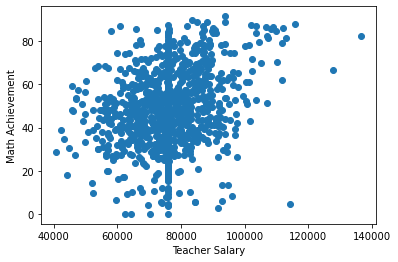

In [97]:
 # Plot the data to find out if a linear trend exists

### BEGIN SOLUTION
plt.scatter(X, y)
plt.xlabel("Teacher Salary")
plt.ylabel("Math Achievement")
### END SOLUTION

In [82]:
 # Use the Sklearn `train_test_split()` function to split the data into training and testing data

from sklearn.model_selection import train_test_split

### BEGIN SOLUTION

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### END SOLUTION

In [83]:
 # Create the model

### BEGIN SOLUTION

from sklearn.linear_model import LinearRegression

model = LinearRegression()

### END SOLUTION

In [84]:
# Fit the model to the training data. 

### BEGIN SOLUTION

model.fit(X_train, y_train)

### END SOLUTION

LinearRegression()

In [85]:
# Calculate the mean_squared_error and the r-squared value
# for the testing data

from sklearn.metrics import mean_squared_error, r2_score

### BEGIN SOLUTION

# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"mean squared error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

### END SOLUTION

mean squared error (MSE): 382.527756345514
R-squared (R2): 0.0002452051874736183


In [86]:
# Call the `score()` method on the model to show the R2 score

### BEGIN SOLUTION
model.score(X_test, y_test)
### END SOLUTION

0.0002452051874736183